In [154]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import keras
import numpy as np
from tensorflow.keras.datasets import mnist

In [155]:
inputs = keras.Input(shape = (28, 28, 1)) # 3차원 텐서 입력

x = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(inputs)
x = layers.MaxPooling2D(pool_size = 2)(x)


x = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)

x = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(x)
x = layers.Flatten()(x) # 텐서를 1차원으로 평탄화 해서 모든 픽셀 값들을 연속적인 벡터 형태로 변환

# 출력 레이어로 완전 연결 레이어로 10개의 뉴런을 가지며 각 뉴런은 이미지가 특정 클래스에 속할 확률을 출력
outputs = layers.Dense(10, activation = 'softmax')(x)

model = keras.Model(inputs = inputs, outputs = outputs)

In [156]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.1693 - accuracy: 0.9479
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0441 - accuracy: 0.9865
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0313 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0230 - accuracy: 0.9931
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0179 - accuracy: 0.9946


In [157]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'테스트 정확도 : {test_acc : .3f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0277 - accuracy: 0.9914
테스트 정확도 :  0.991


### 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기

In [158]:
import gdown

# gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

캐글 데이터셋

In [159]:
from google.colab import files

# files.upload()

In [160]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmode 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
/bin/bash: chmode: command not found


In [161]:
!kaggle competitions download -c dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [162]:
!ls

cats_vs_dogs_small			      dogs-vs-cats.zip	    test1.zip
convnet_from_scratch.keras		      sample_data	    train
convnet_from_scratch_with_augmentation.keras  sampleSubmission.csv  train.zip


In [163]:
# qq 옵션은 quiet 모드로 nuzip 명령어가 해제 과정의 세부 정보를 출력하지않음

# !unzip -qq dogs-vs-cats.zip
# !unzip -qq train.zip

In [164]:
!ls

cats_vs_dogs_small			      dogs-vs-cats.zip	    test1.zip
convnet_from_scratch.keras		      sample_data	    train
convnet_from_scratch_with_augmentation.keras  sampleSubmission.csv  train.zip


이미지를 훈련 검증 테스트 디렉토리로 복사하기


**이미지를 훈련, 검증, 테스트 디렉토리로 복사하기**

코드를 실행하면, 'cats_vs_dogs_small' 디렉토리 아래에 'cat'과 'dog' 각각의 이미지가 포함된 'train', 'validation', 'test' 세 개의 서브 디렉토리가 생성됩니다. 이렇게 하면 원본 이미지 데이터셋의 일부를 추출하여 새로운, 더 작은 데이터셋을 만드는 데 유용

In [165]:
# 원본 이미지 데이터셋에서 일부 데이터를 추출하여 새로운 하위 데이터셋을 생성
# 이 하위 데이터셋은 훈련 검증 테스트의 세가지 부분으로 구성

import os, shutil, pathlib

original_dir = pathlib.Path('train') # train 폴더를 원본 데이터셋의 디렉토리로 설정
new_base_dir = pathlib.Path('cats_vs_dogs_small')

def make_subset(subset_name, start_index, end_index) :
  for category in('cat', 'dog') :
    dir = new_base_dir / subset_name / category # 각 카테고리의 새로운 디렉토리 경로 생성
    if dir.exists():
            shutil.rmtree(dir) # 이미 디렉토리가 존재하면 삭제
    os.makedirs(dir)
    fnames = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src = original_dir / fname, dst = dir / fname) # 원본 디렉토리에서 해당 파일을 복사하여 새 디렉토리에 붙여넣기

make_subset('train', start_index = 0, end_index = 1000)
make_subset('validation', start_index = 1000, end_index = 1500)
make_subset('test', start_index = 1500, end_index = 2500)

In [166]:
!ls cats_vs_dogs_small/

test  train  validation


In [167]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape = (180, 180, 3))

x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation = 'sigmoid')(x)
model = keras.Model(inputs = inputs, outputs = outputs)

In [168]:
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_47 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                     

In [169]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

데이터 전처리

image_dataset_from_directory 를 사용하여 이미지 읽기

In [170]:
from keras.utils.image_dataset import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size = (180, 180),
    batch_size = 32
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation',
    image_size = (180, 180),
    batch_size = 32
)

test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size = (180, 180),
    batch_size = 32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [171]:
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [172]:
import numpy as np
import tensorflow as tf

random_numbers = np.random.normal(size = (1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [173]:
for i, element in enumerate(dataset) :
  print(element.shape)

  if i >= 2:
    break

(16,)
(16,)
(16,)


In [174]:
batched_dataset = dataset.batch(32)

for i, element in enumerate(batched_dataset) :
  print(element.shape)

  if i >= 2:
    break


(32, 16)
(32, 16)
(32, 16)


In [175]:
reshaped_dataset = dataset.map(lambda x : tf.reshape(x, (4, 4)))

for i, element in enumerate(reshaped_dataset) :
  print(element.shape)
  if i >= 2 :
    break

(4, 4)
(4, 4)
(4, 4)


dataset 이 반환하는 데이터와 레이블셋 크기

In [176]:
for data_batch, labels_batch in train_dataset :
  print('데이터 배치 크기 : ', data_batch.shape)
  print('레이블 배치 크기 : ', labels_batch.shape)
  break

데이터 배치 크기 :  (32, 180, 180, 3)
레이블 배치 크기 :  (32,)


dataset 을 사용해 모델 훈련하기

In [177]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'convnet_from_scratch.keras',
        save_best_only = True,
        monitor = 'val_loss'
    )
]

history = model.fit(
    train_dataset,
    epochs = 30,
    validation_data = validation_dataset,
    callbacks = callbacks
)

Epoch 1/30
63/63 [==============================] - 5s 52ms/step - loss: 0.6995 - accuracy: 0.4905 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 3s 47ms/step - loss: 0.6958 - accuracy: 0.5240 - val_loss: 0.6927 - val_accuracy: 0.5010
Epoch 3/30
63/63 [==============================] - 3s 48ms/step - loss: 0.6961 - accuracy: 0.5465 - val_loss: 0.6673 - val_accuracy: 0.5840
Epoch 4/30
63/63 [==============================] - 3s 51ms/step - loss: 0.6661 - accuracy: 0.6270 - val_loss: 0.6254 - val_accuracy: 0.6610
Epoch 5/30
63/63 [==============================] - 3s 46ms/step - loss: 0.6405 - accuracy: 0.6355 - val_loss: 0.6267 - val_accuracy: 0.6470
Epoch 6/30
63/63 [==============================] - 3s 47ms/step - loss: 0.5952 - accuracy: 0.6855 - val_loss: 0.6063 - val_accuracy: 0.6730
Epoch 7/30
63/63 [==============================] - 3s 47ms/step - loss: 0.5779 - accuracy: 0.6960 - val_loss: 0.5944 - val_accuracy: 0.6760
Epoch 8/30
63

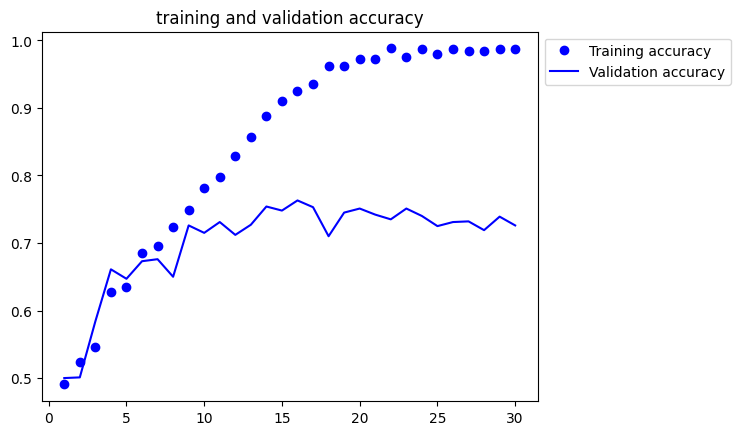

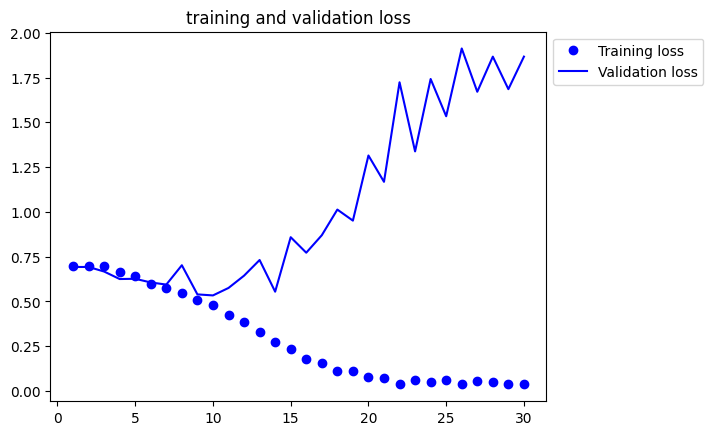

In [178]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('training and validation accuracy')
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('training and validation loss')
plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')

plt.show()

In [179]:
test_model = keras.models.load_model('convnet_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트정확도 : {test_acc: .3f}')

63/63 [==============================] - 2s 20ms/step - loss: 0.5614 - accuracy: 0.7165
테스트정확도 :  0.716


**컨브넷에 추가할 데이터 증식 단계 정의하기**

세 가지 데이터 증강 기법

- layers.RandomFlip("horizontal"): 이미지를 수평 방향으로 무작위로 뒤집습니다. 이는 이미지에 대한 모델의 위치 불변성을 증가시키는 데 도움이 됩니다.

- layers.RandomRotation(0.1): 이미지를 최대 0.1 라디안(약 5.7도) 범위에서 무작위로 회전시킵니다. 회전은 중심을 기준으로 하며, 빈 영역은 근접한 픽셀로 채워집니다.

- layers.RandomZoom(0.2): 이미지를 최대 20% 범위에서 무작위로 확대/축소합니다. 빈 영역은 근접한 픽셀로 채워집니다.

In [188]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

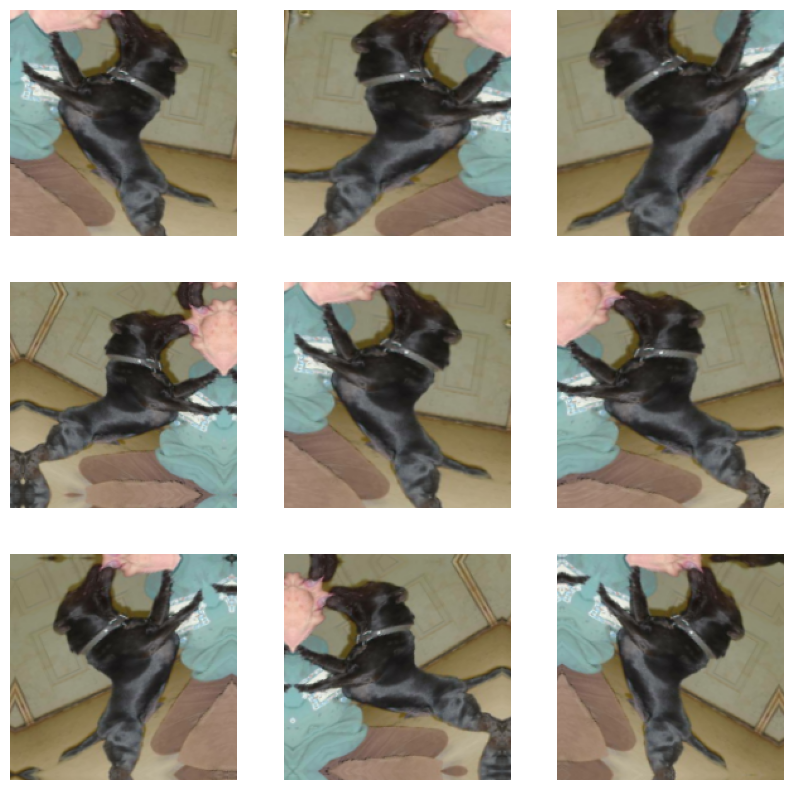

In [189]:
plt.figure(figsize = (10, 10))

for images, _ in train_dataset.take(1) : # 학습 데이터셋에서 하나의 배치를 가져옴

  for i in range(9) :
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    # uint8은 0 부터 255까지의 값을 가질 수 있는 8비트 정수타입을 의미하며 이는 이미지 데이터를 표현하는데 일반적으로
    # astype('unint8)을 호출함으로서 이미지 데이터가 해당 범위 내에 있도록 보장
    plt.axis('off')

In [190]:
inputs = keras.Input(shape = (180, 180, 3))

x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation = 'sigmoid')(x)
model = keras.Model(inputs = inputs, outputs = outputs)

model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [191]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'convnet_from_scratch_with_augmentation.keras',
        save_best_only = True,
        monitor = 'val_loss'
    )
]

history = model.fit(
    train_dataset,
    epochs = 100,
    validation_data = validation_dataset,
    callbacks = callbacks)

Epoch 1/100
63/63 [==============================] - 6s 53ms/step - loss: 0.7002 - accuracy: 0.5085 - val_loss: 0.8027 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 3s 49ms/step - loss: 0.6966 - accuracy: 0.5035 - val_loss: 0.6906 - val_accuracy: 0.5010
Epoch 3/100
63/63 [==============================] - 3s 53ms/step - loss: 0.6915 - accuracy: 0.5315 - val_loss: 0.6884 - val_accuracy: 0.5090
Epoch 4/100
63/63 [==============================] - 3s 50ms/step - loss: 0.6826 - accuracy: 0.5880 - val_loss: 0.6615 - val_accuracy: 0.5910
Epoch 5/100
63/63 [==============================] - 3s 49ms/step - loss: 0.6686 - accuracy: 0.6040 - val_loss: 0.6730 - val_accuracy: 0.5740
Epoch 6/100
63/63 [==============================] - 3s 49ms/step - loss: 0.6530 - accuracy: 0.6235 - val_loss: 0.8110 - val_accuracy: 0.5550
Epoch 7/100
63/63 [==============================] - 3s 51ms/step - loss: 0.6339 - accuracy: 0.6525 - val_loss: 0.6645 - val_accuracy: 0.6380
Epoch 

In [192]:
test_model = keras.models.load_model(
    'convnet_from_scratch_with_augmentation.keras'
)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc: .3f}')

63/63 [==============================] - 2s 22ms/step - loss: 0.4588 - accuracy: 0.8100
테스트 정확도 :  0.810


### 사전 훈련된 모델 활용하기

vgg16 합성곱 기반 층 만들기

In [185]:
from tensorflow.python.util.traceback_utils import include_frame
conv_base = keras.applications.vgg16.VGG16(
    weights = 'imagenet', # 모델에 imagenet 데이터베이스에서 훈련된 가중치를 사용하겠다는 의미
    include_top = False,
    input_shape = (180, 180, 3)
)

In [186]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     